In [1]:
import nltk
import numpy as np


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd

file = "text2.xlsx"
data = pd.read_excel(file)

# data

In [3]:
df = data.values.tolist()

# final_data= 
print(df[0][1][0:90])


final_data = []

for i in range(len(df)):
    final_data.append(df[i][1])
    
# final_data

It was, gentlemen, after a long absence — seven years to be exact, during which
time I was


In [4]:
stopwords=stopwords.words("english")



In [5]:
# pip install spacy==2.3.5
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

In [5]:
def lemmatization(texts, allowed_postags = ["NOUNS","ADJ","VERB","ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out= []
    for text in texts:
        doc = nlp(text)
#         print(doc)
        new_text = []
        for token in doc:
#             print(token)
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out
                     
lemmatized_texts=lemmatization(final_data)



In [6]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(final_data)





In [8]:
# testss = lemmatized_texts[0]

In [9]:
# gensim.utils.simple_preprocess(testss, deacc=True)


In [7]:
def gen_words(texts):
    final = []
    for i in texts:
            new = gensim.utils.simple_preprocess(i, deacc= False)
            final.append(new)
    return final

data_words = gen_words(lemmatized_texts)

In [11]:
data_words

[['say',
  'buy',
  'flower',
  'have',
  'work',
  'cut',
  'door',
  'be',
  'take',
  'hinge',
  'man',
  'be',
  'come',
  'then',
  'think',
  'morning',
  'fresh',
  'issue',
  'child',
  'beach',
  'lark',
  'plunge',
  'so',
  'have',
  'always',
  'seem',
  'when',
  'little',
  'squeak',
  'hinge',
  'hear',
  'now',
  'have',
  'burst',
  'open',
  'french',
  'window',
  'plunge',
  'open',
  'air',
  'how',
  'fresh',
  'how',
  'calm',
  'still',
  'course',
  'air',
  'be',
  'early',
  'morning',
  'flap',
  'wave',
  'kiss',
  'wave',
  'chill',
  'sharp',
  'yet',
  'girl',
  'then',
  'be',
  'solemn',
  'feel',
  'do',
  'stand',
  'there',
  'open',
  'window',
  'awful',
  'be',
  'about',
  'happen',
  'look',
  'flower',
  'tree',
  'smoke',
  'wind',
  'rook',
  'rise',
  'fall',
  'standing',
  'look',
  'say',
  'musing',
  'vegetables',
  'was',
  'prefer',
  'man',
  'cauliflowers',
  'was',
  'have',
  'say',
  'breakfast',
  'morning',
  'when',
  'have',

In [8]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=75)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=75)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0])

['be', 'gentleman', 'long', 'absence', 'year', 'be', 'exact', 'time', 'be', 'study', 'return', 'people', 'learn', 'much', 'much', 'pass', 'by', 'story', 'important', 'thing', 'be', 'return', 'great', 'yearning', 'people', 'small', 'village', 'bend', 'year', 'have', 'long', 'have', 'dream', 'be', 'extraordinary', 'moment', 'when', 'last', 'find', 'stand', 'rejoice', 'have', 'back', 'make', 'great', 'fuss', 'be', 'long', 'feel', 'piece', 'ice', 'be', 'melt', 'inside', 'be', 'frozen', 'substance', 'sun', 'have', 'shine', 'life', 'warmth', 'tribe', 'have', 'lose', 'time', 'land', 'fish', 'die', 'cold', 'ear', 'have', 'become', 'use', 'voice', 'eye', 'grow', 'accustomed', 'form', 'have', 'think', 'so', 'much', 'absence', 'rather', 'fog', 'rise', 'first', 'instant', 'see', 'fog', 'clear', 'awake', 'second', 'day', 'arrival', 'familiar', 'bed', 'room', 'wall', 'have', 'witness', 'trivial', 'incident', 'life', 'childhood', 'onset', 'adolescence', 'listen', 'intently', 'wind', 'indeed', 'be', '

In [9]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [14]:
# id2words = corpora.Dictionary(data_words)

# corpus = []

# for text in data_words:
#     new = id2words.doc2bow(text)
#     corpus.append(new)



In [10]:
num_topics = 30

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")



In [109]:
top_topics = lda_model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -2.2025.
[([(0.008239214, 'top'),
   (0.0064291554, 'hair'),
   (0.006426687, 'gentleman'),
   (0.006426322, 'dinner'),
   (0.005525558, 'age'),
   (0.0055230972, 'chair'),
   (0.005520423, 'ambulance'),
   (0.0046193274, 'theory'),
   (0.004618465, 'pretty'),
   (0.0046162447, 'hotel'),
   (0.0046146777, 'high'),
   (0.0037126853, 'indian'),
   (0.0037125954, 'upstairs'),
   (0.0037123375, 'less'),
   (0.0037123265, 'square'),
   (0.0037106422, 'salmon'),
   (0.0037098436, 'easily'),
   (0.0028213572, 'motor_car'),
   (0.0028161542, 'presumably'),
   (0.002811641, 'laughter')],
  -0.23176406585880824),
 ([(0.007794431, 'death'),
   (0.00778988, 'use'),
   (0.007786222, 'wear'),
   (0.0058744294, 'hair'),
   (0.0058735586, 'past'),
   (0.005865088, 'fine'),
   (0.004906311, 'curtain'),
   (0.004903549, 'stay'),
   (0.0049024927, 'orchid'),
   (0.0039546997, 'corner'),
   (0.0039451965, 'anyhow'),
   (0.0039438903, 'english'),
   (0.0039437404, 'lace'),
   (0.00

In [110]:
cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')

cm.get_coherence()

-2.202518800599948

In [11]:
num_topics = 30

x = []
y = []

for i in range(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i+1,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")
    
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
    
    x.append(i+1)
    y.append(cm.get_coherence())
    


# code for loop
# append cohorence score for each model
# plot dictionary for matplot lib 


In [115]:
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-14.086201090600472, -13.653841891170138, -13.093741409545588, -11.773242130460721, -11.276423217954548, -8.841257737384895, -7.727668583143147, -6.928822374417548, -5.502050782732769, -2.202518800599948]


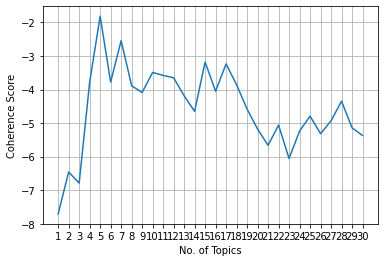

Optimal number of topics is 5 with a Coherence Score of -1.8156751406437557


In [12]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.grid()
plt.ylabel('Coherence Score')
plt.xlabel('No. of Topics')
plt.show()

num_topics = y.index(max(y))+1

print("Optimal number of topics is {} with a Coherence Score of {}".format(num_topics, max(y)))

In [13]:


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [14]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)


In [15]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.104035  0.143221       1        1  55.599098
4     -0.011067 -0.143114       2        1  13.089208
3     -0.116883 -0.036359       3        1  10.551024
2     -0.073878  0.081622       4        1  10.418420
0      0.097792 -0.045370       5        1  10.342250, topic_info=            Term       Freq      Total Category  logprob  loglift
348  grandfather  41.000000  41.000000  Default  30.0000  30.0000
220       donkey  16.000000  16.000000  Default  29.0000  29.0000
477         love  29.000000  29.000000  Default  28.0000  28.0000
76           bed  12.000000  12.000000  Default  27.0000  27.0000
997          boy  14.000000  14.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
67          bank   1.732919  11.661825   Topic5  -5.7455   0.3624
174     daughter   1.729825  11.656988   Topic5  -5.7473   0.3610
444         land   1.733458  14.828629   Topic5  -5.7452   0.1225
168    curiosity   1.322170   6.157097   Topic5  -6.0161   0.7306
581        paper   1.316924   5.031921   Topic5  -6.0200   0.9284

[259 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         5  0.574614   absence
18        5  0.928731    afraid
946       3  0.570819       air
1643      4  0.752021     allow
2066      1  0.563399     angry
...     ...       ...       ...
2046      1  0.976121      wine
922       3  0.570829      wood
1622      1  0.998750     write
928       1  0.949304      year
929       5  0.779395  year_ago

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

In [46]:
Hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus, id2word=id2word)


In [47]:
pprint(Hdp_model.print_topics())

[(0,
  '0.008*matter + 0.008*kill + 0.007*hat + 0.006*husband + 0.006*patient + '
  '0.006*human_nature + 0.006*shop + 0.005*age + 0.005*case + 0.005*shape'),
 (1,
  '0.009*up + 0.008*down + 0.008*smoke + 0.007*beauty + 0.006*aeroplane + '
  '0.005*green + 0.005*hall + 0.004*stare + 0.004*darkness + 0.004*drop'),
 (2,
  '0.008*top + 0.006*dinner + 0.006*gentleman + 0.006*hair + 0.005*age + '
  '0.005*chair + 0.005*ambulance + 0.004*pretty + 0.004*theory + 0.004*high'),
 (3,
  '0.014*shop + 0.012*motor_car + 0.009*car + 0.006*glove + 0.005*sweet + '
  '0.005*rose + 0.005*pea + 0.005*hat + 0.004*positive + 0.004*crowd'),
 (4,
  '0.011*marry + 0.008*grow + 0.008*truth + 0.007*awful + 0.006*presumably + '
  '0.006*rock + 0.004*public + 0.004*anyhow + 0.004*suffer + '
  '0.004*extraordinary'),
 (5,
  '0.006*sense_proportion + 0.005*patient + 0.005*carnation + 0.004*proportion '
  '+ 0.004*coffee + 0.004*smile + 0.004*however + 0.004*will + 0.003*catch + '
  '0.003*fail'),
 (6,
  '0.007*deat

In [52]:
cm2 = CoherenceModel(model=Hdp_model, corpus=corpus, dictionary=id2word, coherence='u_mass')

cm2.get_coherence()

-17.020434616780992